In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np # linear algebra
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Global Temperatures

In [3]:
global_temp = pd.read_csv('GlobalTemperatures.csv')
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
global_temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [5]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 224.5+ KB


# Temperature through years

In [65]:
global_temp.dt = pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp['dt']=global_temp['dt'].apply(lambda x:x[6:])
global_temp1=global_temp.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()
global_temp1.head()

,dt,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0A2048C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D0A294A470>]], dtype=object)

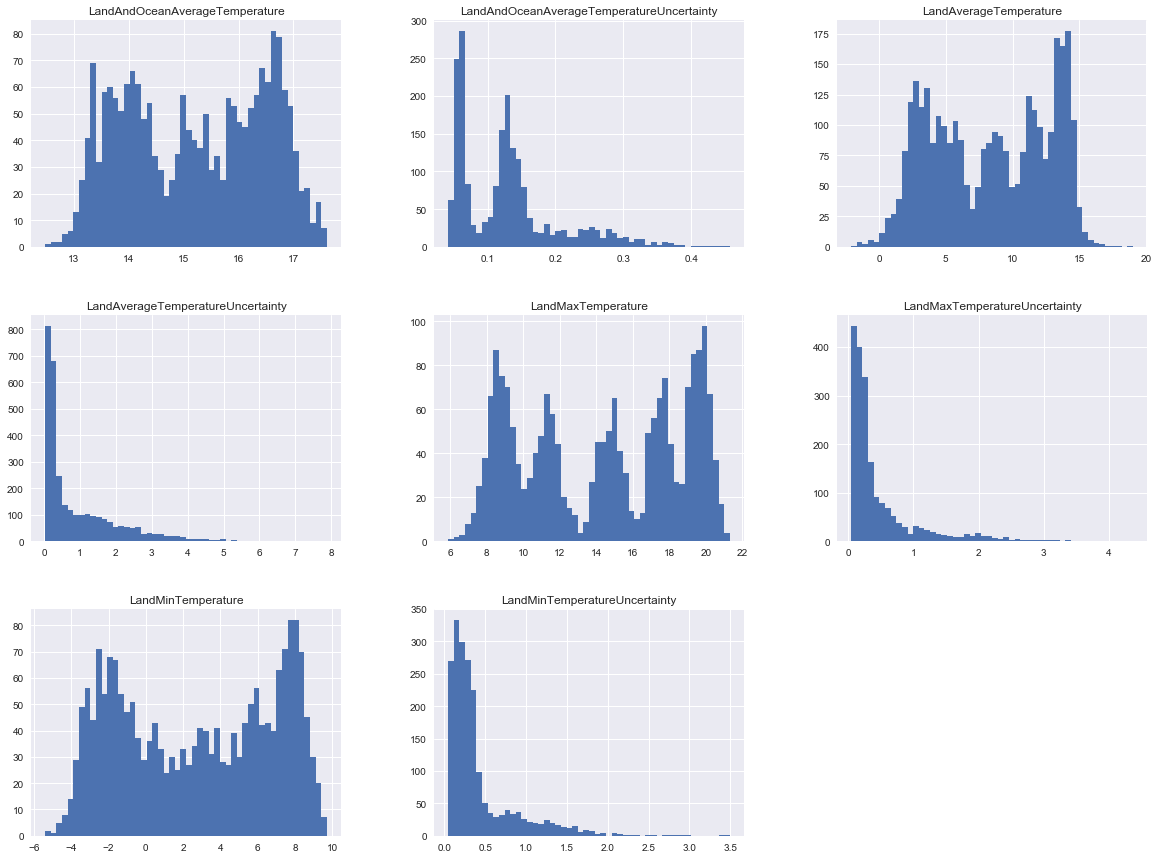

In [7]:
global_temp.hist(bins=50, figsize=(20,15))

In [31]:
trace = go.Scatter( 
    y= global_temp1.LandAverageTemperature,
    x = global_temp1.dt,
)
data = [trace]

In [32]:
layout = go.Layout(
    xaxis = dict(
    title = 'Temperature'),
    yaxis = dict(
    title = 'Land Average Temperature')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='line-mode')

In [59]:
trace = go.Scatter (
    x = global_temp.LandAverageTemperature,
    y = global_temp.LandAndOceanAverageTemperature,
     mode = 'markers'
)
data = [trace]
#global_temp.plot(kind = 'scatter', x = 'LandAverageTemperature', y ='LandAndOceanAverageTemperature', figsize=(15,15))

In [63]:
layout = go.Layout(
    xaxis = dict(
    title = 'LandAverageTemperature'),
    yaxis = dict(
    title = 'LandAndOceanAverageTemperature')
)
fig = go.Figure(data=data, layout=layout)


In [64]:
py.iplot(fig, filename='basic-scatter')

# Temperature by Months

In [81]:
global_temp2 = pd.read_csv('GlobalTemperatures.csv')

In [89]:
global_temp2.dt = pd.to_datetime(global_temp2.dt).dt.strftime('%d/%m/%Y')

In [96]:
global_temp2['Month'] = global_temp2['dt'].apply(lambda x:x[3:5])
global_temp2['Year'] = global_temp2['dt'].apply(lambda x:x[6:])

In [97]:
global_temp2.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Month,Year
0,01/01/1750,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,01,1750
1,01/02/1750,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,02,1750
2,01/03/1750,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,03,1750
3,01/04/1750,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,04,1750
4,01/05/1750,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,05,1750


In [98]:
global_temp2 = global_temp2[['Month', 'Year', 'LandAverageTemperature']]

It's best to create a Dict for months

In [103]:
global_temp2['Month']=global_temp2['Month'].map({'01':'Jan','02':'Feb','03':'Mar','04':'Apr',
                                       '05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep',
                                       '10':'Oct','11':'Nov','12':'Dec'})

In [120]:
def plot_month (month1, month2):
    a = global_temp2[global_temp2['Month'] == month1]
    b = global_temp2[global_temp2['Month'] == month2]
    trace0 = go.Scatter(
        x = a['Year'],
        y = a['LandAverageTemperature'],
        mode = 'lines',
        name = month1
    )
    trace1 = go.Scatter(
        x = b['Year'],
        y = b['LandAverageTemperature'],
        mode = 'lines',
        name = month2
    )
    data = [trace0, trace1]
    
    layout = go.Layout(
    xaxis = dict(
    title = 'Year'),
    yaxis = dict(
    title = 'LandAverageTemperature (\u00b0C)')
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='temperature-month')


In [121]:
plot_month('Aug','Dec')